In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# give the datafile name
datafile= 'all_words_pivot.csv'

df = pd.read_csv(datafile, header=0, sep=',', encoding='utf-8')
df.info() # could also use df_final.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29036 entries, 0 to 29035
Data columns (total 8 columns):
matched word    29035 non-null object
freq in pws     29036 non-null int64
freq in web     29036 non-null int64
POS freq        29036 non-null int64
POS             29036 non-null object
analysis        29036 non-null object
finnish word    29036 non-null bool
finnish name    29036 non-null bool
dtypes: bool(2), int64(3), object(3)
memory usage: 1.4+ MB


In [2]:
df.head()

,matched word,freq in pws,freq in web,POS freq,POS,analysis,finnish word,finnish name
0,salasana,1313,16553,16173,NOUN,Case=Nom|Number=Sing,True,False
1,kissa,954,54393,52191,NOUN,Case=Nom|Number=Sing,True,False
2,koira,835,138611,137680,NOUN,Case=Nom|Number=Sing,True,False
3,nalle,659,8667,5053,NOUN,Case=Nom|Number=Sing,True,True
4,johanna,567,39837,39280,PROPN,Case=Nom|Number=Sing,False,True


In [3]:
df = df.rename(columns={'matched word': 'word', 'finnish word': 'Finnish word', 'finnish name': 'Finnish name'})

### Function for rendering dataframe table to figure

In [4]:
#https://stackoverflow.com/questions/19726663/how-to-save-the-pandas-dataframe-series-data-as-a-figure

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six


def render_mpl_table(data, rows=None, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='#40466e',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])#+np.array([8, 0])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, rowLabels=rows, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax


### Finnish names and words

#### freq in pws

In [5]:
'''Finnish name, percentage of all words used in passwords'''
(df[df['Finnish name']==True]['freq in pws'].sum()/float(df['freq in pws'].sum()))*100

52.20114033229931

In [6]:
'''Finnish name, percentage of unique words used in passwords'''
(df[df['Finnish name']==True]['freq in pws'].count()/float(df['freq in pws'].count()))*100

33.634109381457499

In [7]:
'''Finnish word, percentage of all words used in passwords'''
(df[df['Finnish word']==True]['freq in pws'].sum()/float(df['freq in pws'].sum()))*100

45.990772693484821

In [8]:
'''Finnish word, percentage of unique words used in passwords'''
(df[df['Finnish word']==True]['freq in pws'].count()/float(df['freq in pws'].count()))*100

46.376911420305831

In [9]:
dff = pd.DataFrame()

#### freq in web

In [10]:
'''Finnish name, percentage of all words used in web'''
(df[df['Finnish name']==True]['freq in web'].sum()/float(df['freq in web'].sum()))*100

17.242450703088011

In [11]:
'''Finnish name, percentage of unique words used in web'''
(df[df['Finnish name']==True]['freq in web'].count()/float(df['freq in web'].count()))*100

33.634109381457499

In [12]:
'''Finnish word, percentage of all words used in web'''
(df[df['Finnish word']==True]['freq in web'].sum()/float(df['freq in web'].sum()))*100

89.137309440220875

In [13]:
'''Finnish word, percentage of unique words used in web'''
(df[df['Finnish word']==True]['freq in web'].count()/float(df['freq in web'].count()))*100

46.376911420305831

#### As a small dataframe

In [14]:
dff.loc['Finnish word','percent in pws'] = \
'{0:.3}'.format(float((df[df['Finnish word']==True]['freq in pws'].sum()/float(df['freq in pws'].sum()))*100))
dff.loc['Finnish word','percent in web'] = \
'{0:.3}'.format(float((df[df['Finnish word']==True]['freq in web'].sum()/float(df['freq in web'].sum()))*100))
dff.loc['Finnish name','percent in pws'] = \
'{0:.3}'.format(float((df[df['Finnish name']==True]['freq in pws'].sum()/float(df['freq in pws'].sum()))*100))
dff.loc['Finnish name','percent in web'] = \
'{0:.3}'.format(float((df[df['Finnish name']==True]['freq in web'].sum()/float(df['freq in web'].sum()))*100))

dff

,percent in pws,percent in web
Finnish word,46.0,89.1
Finnish name,52.2,17.2


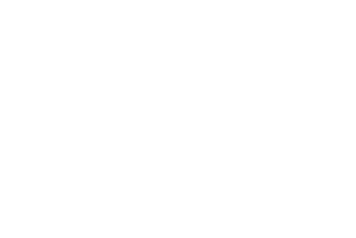

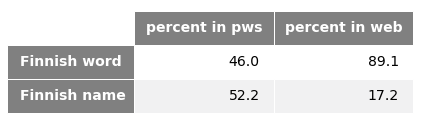

In [15]:
dft=dff
rows = [i for i in dft.index]

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

render_mpl_table(dft, header_columns=0, col_width=2.5, rows = rows, header_color='grey',  edge_color='w')

#plt.tight_layout()
#plt.savefig('posmorphtable_grey.png')
plt.savefig('finnish_percent.png', format='png', dpi=300, bbox_inches='tight')
plt.savefig('finnish_percent.eps', format='eps', dpi=300, bbox_inches='tight');

In [16]:
df[df['word'].isin(['batman','aurinko'])]

,word,freq in pws,freq in web,POS freq,POS,analysis,Finnish word,Finnish name
5,aurinko,567,84299,71522,NOUN,Case=Nom|Number=Sing,True,True
804,batman,53,5080,3027,PROPN,Case=Gen|Number=Sing,False,False


### POS and morph frequencies

In [17]:
mypos = pd.DataFrame([str(val) for i, val in enumerate(df.POS)])
myanalysis = pd.DataFrame([str(val) for i, val in enumerate(df.analysis)])
df['label'] = mypos + ' ' +  myanalysis

In [18]:
df.head()

,word,freq in pws,freq in web,POS freq,POS,analysis,Finnish word,Finnish name,label
0,salasana,1313,16553,16173,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
1,kissa,954,54393,52191,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
2,koira,835,138611,137680,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
3,nalle,659,8667,5053,NOUN,Case=Nom|Number=Sing,True,True,NOUN Case=Nom|Number=Sing
4,johanna,567,39837,39280,PROPN,Case=Nom|Number=Sing,False,True,PROPN Case=Nom|Number=Sing


In [19]:
mycols = ['label','freq in pws','freq in web']
df2 = df[mycols]

In [20]:
df2.head()

,label,freq in pws,freq in web
0,NOUN Case=Nom|Number=Sing,1313,16553
1,NOUN Case=Nom|Number=Sing,954,54393
2,NOUN Case=Nom|Number=Sing,835,138611
3,NOUN Case=Nom|Number=Sing,659,8667
4,PROPN Case=Nom|Number=Sing,567,39837


In [21]:
percentpws = (df2['freq in pws']/df2['freq in pws'].sum())*100
df2.insert(2, 'percent in pws', percentpws)

In [22]:
df2.head(3)

,label,freq in pws,percent in pws,freq in web
0,NOUN Case=Nom|Number=Sing,1313,0.545250,16553
1,NOUN Case=Nom|Number=Sing,954,0.396168,54393
2,NOUN Case=Nom|Number=Sing,835,0.346751,138611


In [23]:
percentweb = df2['freq in pws']/df2['freq in web'].sum()*100
df2.insert(4, 'percent in web', percentweb)

In [24]:
df2['percent in web'].sum(), df2['percent in pws'].sum()

(0.081847957040398239, 99.999999999999986)

In [25]:
# can't get this working here, for some reason, takes place later
#df2['percent in web'] = df2['percent in web'].map(lambda x: '{0:.3}'.format(x))
# df2['percent in pws'] = df2['percent in pws'].map(lambda x: '{0:.2}'.format(x))

In [26]:
df2.head()

,label,freq in pws,percent in pws,freq in web,percent in web
0,NOUN Case=Nom|Number=Sing,1313,0.545250,16553,0.000446
1,NOUN Case=Nom|Number=Sing,954,0.396168,54393,0.000324
2,NOUN Case=Nom|Number=Sing,835,0.346751,138611,0.000284
3,NOUN Case=Nom|Number=Sing,659,0.273663,8667,0.000224
4,PROPN Case=Nom|Number=Sing,567,0.235458,39837,0.000193


In [27]:
# sort the data
# dfa by word frequency in passwords
# dfw by word frequency in web
dfa = df2.groupby(['label']).sum().sort_values(['freq in pws'],ascending=False)
dfw = df2.groupby(['label']).sum().sort_values(['freq in web'],ascending=False)

### By word frequency in pw data

In [28]:
dfa.head()

,freq in pws,percent in pws,freq in web,percent in web
label,,,,
PROPN Case=Nom|Number=Sing,123651,51.348590,24022592,0.042028
NOUN Case=Nom|Number=Sing,73821,30.655670,47737381,0.025091
PROPN _,9676,4.018156,5556757,0.003289
PROPN Case=Gen|Number=Sing,4492,1.865394,5710400,0.001527
ADJ Case=Nom|Degree=Pos|Number=Sing,4054,1.683506,14385913,0.001378


In [29]:
# format the output into a cleaner precision
dfa['percent in web'] = dfa['percent in web'].map(lambda x: '{0:.3}'.format(x))
dfa['percent in pws'] = dfa['percent in pws'].map(lambda x: '{0:.3}'.format(x))

In [30]:
dfa.head()

,freq in pws,percent in pws,freq in web,percent in web
label,,,,
PROPN Case=Nom|Number=Sing,123651,51.3,24022592,0.042
NOUN Case=Nom|Number=Sing,73821,30.7,47737381,0.0251
PROPN _,9676,4.02,5556757,0.00329
PROPN Case=Gen|Number=Sing,4492,1.87,5710400,0.00153
ADJ Case=Nom|Degree=Pos|Number=Sing,4054,1.68,14385913,0.00138


In [31]:
np.array([13, 10])

array([13, 10])

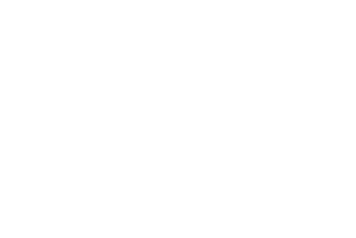

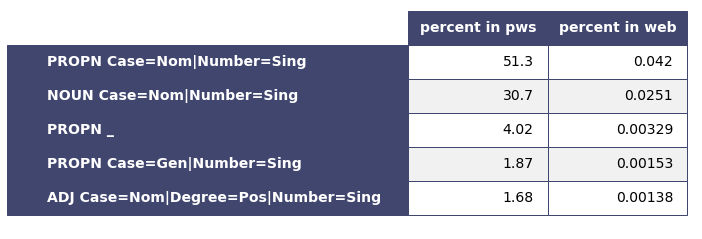

In [32]:
# dff = dfa.copy()
# dff.reset_index(level=0, inplace=True)
# dft = dff[['label','percent in pws','percent in web']].head()
dft=dfa[['percent in pws','percent in web']].head()
rows = [i for i in dft.index]

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

render_mpl_table(dft, header_columns=0, col_width=2.5, rows = rows)


#plt.tight_layout()
#plt.savefig('posmorphtable_blue.png')
plt.savefig('posmorphtable_blue.png', bbox_inches='tight')
#plt.savefig('posmorphtable_blue.png', format='png', dpi=300, bbox_inches='tight')
plt.savefig('posmorphtable_blue.eps', format='eps', dpi=300, bbox_inches='tight');

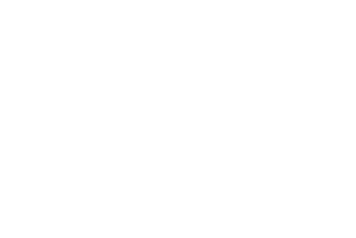

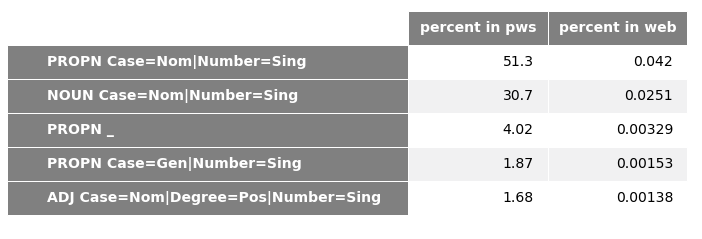

In [33]:
# dff = dfa.copy()
# dff.reset_index(level=0, inplace=True)
# dft = dff[['label','percent in pws','percent in web']].head()
dft=dfa[['percent in pws','percent in web']].head()
rows = [i for i in dft.index]

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

render_mpl_table(dft, header_columns=0, col_width=2.5, rows = rows, header_color='grey',  edge_color='w')

#plt.tight_layout()
#plt.savefig('posmorphtable_grey.png')
plt.savefig('posmorphtable_grey.png', format='png', dpi=300, bbox_inches='tight')
plt.savefig('posmorphtable_grey.eps', format='eps', dpi=300, bbox_inches='tight');

### Top 5 word examples from the top 5 pos+morph categories

In [34]:
df[['word','freq in pws']][df['label']=='NOUN Case=Nom|Number=Sing'].sort_values(['freq in pws'],ascending=False).head()

,word,freq in pws
0,salasana,1313
1,kissa,954
2,koira,835
3,nalle,659
5,aurinko,567


In [35]:
df[['word','freq in pws']][df['label']=='PROPN Case=Nom|Number=Sing'].sort_values(['freq in pws'],ascending=False).head()

,word,freq in pws
4,johanna,567
7,antti,493
10,ville,426
11,emilia,425
18,mikko,382


In [36]:
df[['word','freq in pws']][df['label']=='PROPN _'].sort_values(['freq in pws'],ascending=False).head()

,word,freq in pws
44,love,310
156,the,176
221,star,148
285,master,124
297,dragon,119


In [37]:
df[['word','freq in pws']][df['label']=='PROPN Case=Gen|Number=Sing'].sort_values(['freq in pws'],ascending=False).head()

,word,freq in pws
82,man,249
516,pokemon,79
804,batman,53
829,sebastian,52
979,iron,45


In [38]:
# For batman categorie, check a random sample of 10
df[['word','freq in pws']][df['label']=='PROPN Case=Gen|Number=Sing'].sample(10)

,word,freq in pws
9262,ahlgren,4
16803,kikin,2
18273,holmin,1
24096,eestin,1
7049,gillan,5
27466,arben,1
9329,arian,4
14387,veeran,2
21491,sheldon,1
3427,heaven,13


In [39]:
df[['word','freq in pws']][df['label']=='ADJ Case=Nom|Degree=Pos|Number=Sing'].sort_values(['freq in pws'],ascending=False).head()

,word,freq in pws
13,rakas,405
97,oma,223
106,hullu,218
234,terve,140
263,salainen,131


### By word frequency in web data

In [40]:
dfw.head()

,freq in pws,percent in pws,freq in web,percent in web
label,,,,
ADV _,2021,0.839261,61336613,0.000687
NOUN Case=Nom|Number=Sing,73821,30.655670,47737381,0.025091
PROPN Case=Nom|Number=Sing,123651,51.348590,24022592,0.042028
ADJ Case=Nom|Degree=Pos|Number=Sing,4054,1.683506,14385913,0.001378
VERB Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act,974,0.404473,11718459,0.000331


In [41]:
dfw['percent in web'] = dfw['percent in web'].map(lambda x: '{0:.3}'.format(x))
dfw['percent in pws'] = dfw['percent in pws'].map(lambda x: '{0:.3}'.format(x))

In [42]:
dfw.head()

,freq in pws,percent in pws,freq in web,percent in web
label,,,,
ADV _,2021,0.839,61336613,0.000687
NOUN Case=Nom|Number=Sing,73821,30.7,47737381,0.0251
PROPN Case=Nom|Number=Sing,123651,51.3,24022592,0.042
ADJ Case=Nom|Degree=Pos|Number=Sing,4054,1.68,14385913,0.00138
VERB Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act,974,0.404,11718459,0.000331


## Plots

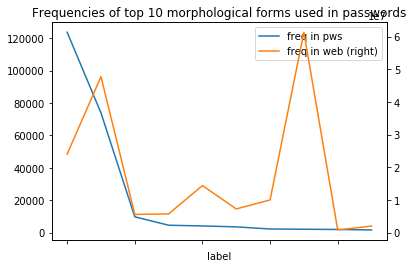

In [43]:
sample = 10
title = 'Frequencies of top ' + str(sample) + ' morphological forms used in passwords'
dfa['freq in pws'][:sample].plot(legend=True, title = title);
dfa['freq in web'][:sample].plot(secondary_y=True, legend=True);

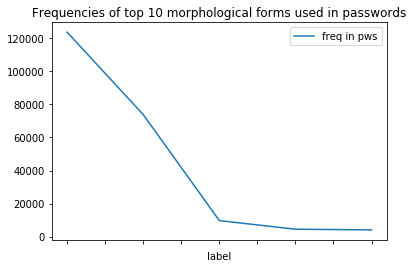

In [44]:
dfb = dfa[:5]
dfb.plot(y = 'freq in pws',x=dfb.index,legend=True, title = title);

### Examples of the most used words

In [45]:
# Most used words, sort the original dataframe by frequency used in pws
dfsort = df.sort_values(['freq in pws'],ascending=False).reset_index(drop=True)

In [46]:
dfsort.head()

,word,freq in pws,freq in web,POS freq,POS,analysis,Finnish word,Finnish name,label
0,salasana,1313,16553,16173,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
1,kissa,954,54393,52191,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
2,koira,835,138611,137680,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
3,nalle,659,8667,5053,NOUN,Case=Nom|Number=Sing,True,True,NOUN Case=Nom|Number=Sing
4,johanna,567,39837,39280,PROPN,Case=Nom|Number=Sing,False,True,PROPN Case=Nom|Number=Sing


In [47]:
dfsort['word'][:sample].values

array([u'salasana', u'kissa', u'koira', u'nalle', u'johanna', u'aurinko',
       u'perkele', u'antti', u'qwerty', u'paska'], dtype=object)

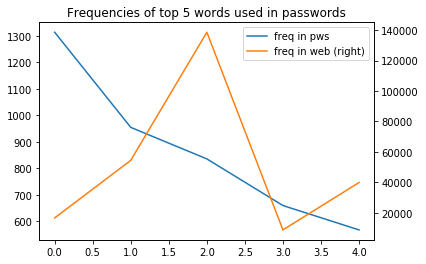

In [48]:
#https://stackoverflow.com/questions/11640243/pandas-plot-multiple-y-axes

sample = 5
title = 'Frequencies of top ' + str(sample) + ' words used in passwords'
x = [str(i) for i in dfsort['word'][:sample]]
dfsort['freq in pws'][:sample].plot(legend=True, title = title, x=x);
dfsort['freq in web'][:sample].plot(secondary_y=True, legend=True, sharex = True);


In [49]:
x

['salasana', 'kissa', 'koira', 'nalle', 'johanna']

15 15


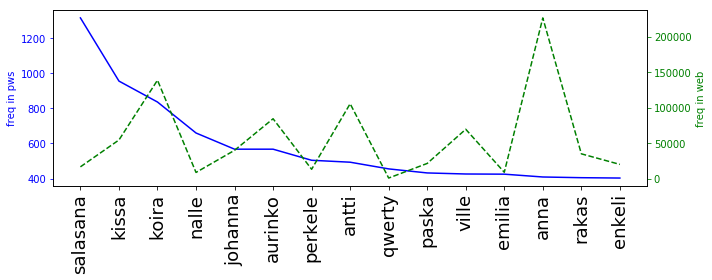

In [50]:
#https://matplotlib.org/gallery/api/two_scales.html

sample = 15

fig, ax1 = plt.subplots(figsize=(10,4))
x = [i for i in dfsort[:sample].index]
x_ticks_labels = [str(i) for i in dfsort['word'][:sample]]
y1 = dfsort['freq in pws'][:sample]
print len(x), len(y1)
ax1.plot(x, y1, 'b-')
#ax1.set_xlabel('words')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('freq in pws', color='b')
ax1.tick_params('y', colors='b')
# Set number of ticks for x-axis
ax1.set_xticks(x)
# Set ticks labels for x-axis
ax1.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)

ax2 = ax1.twinx()
y2 = dfsort['freq in web'][:sample]
ax2.plot(x, y2, 'g--')
ax2.set_ylabel('freq in web', color='g')
ax2.tick_params('y', colors='g')

fig.tight_layout()
#plt.show()
plt.savefig('wordfreq.png', format='png', dpi=300)
plt.savefig('wordfreq.eps', format='eps', dpi=300);

8 8


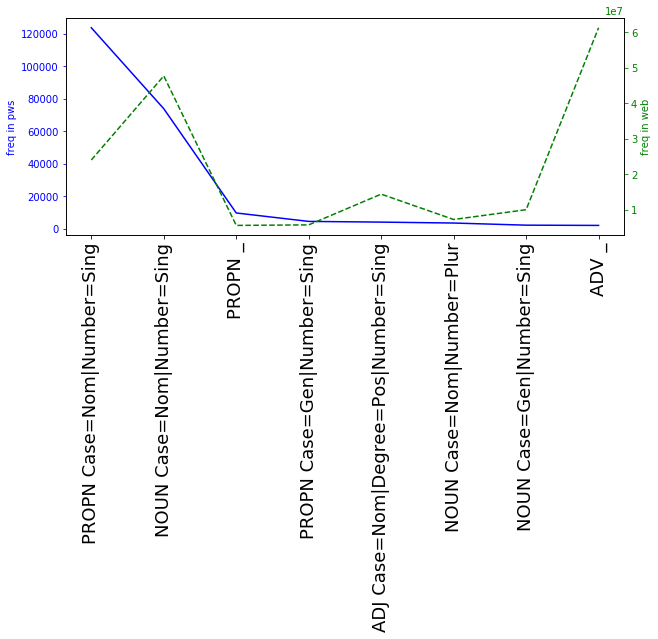

In [51]:
#https://matplotlib.org/gallery/api/two_scales.html

sample = 8
#title = 'Frequencies of top ' + str(sample) + ' words used in passwords'

fig, ax1 = plt.subplots(figsize=(10,4))
x = [i for i, val in enumerate(dfa[:sample].index)]
x_ticks_labels = [str(i) for i in dfa[:sample].index]
y1 = dfa['freq in pws'][:sample]
print len(x), len(y1)
ax1.plot(x, y1, 'b-')
ax1.set_xlabel('')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('freq in pws', color='b')
ax1.tick_params('y', colors='b')
# Set number of ticks for x-axis
ax1.set_xticks(x)
# Set ticks labels for x-axis
ax1.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)

ax2 = ax1.twinx()
y2 = dfa['freq in web'][:sample]
ax2.plot(x, y2, 'g--')
ax2.set_ylabel('freq in web', color='g')
ax2.tick_params('y', colors='g')

#fig.tight_layout()
plt.show()